# Dataset Spatial operation methods

<p align="center">
    <img src="../../docs/source/_images/schemes/spatial-operation.png" alt= "dataset prperties" width=150 height=300>
</p>

In [2]:
from pyramids.dataset import Dataset
path = "../../examples/data/dem/DEM5km_Rhine_burned_fill.tif"

In [3]:
dataset = Dataset.read_file(path)

In [4]:
print(dataset)


            Cell size: 5000.0
            Dimension: 125 * 93
            EPSG: 4647
            Number of Bands: 1
            Band names: ['Band_1']
            Mask: -3.4028234663852886e+38
            Data type: float32
            File: ../../examples/data/dem/DEM5km_Rhine_burned_fill.tif
        


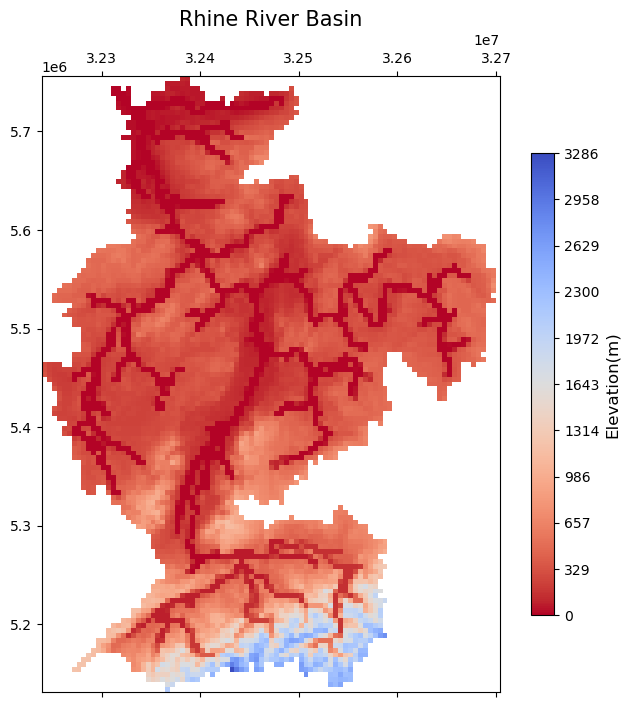

(<Figure size 800x800 with 2 Axes>,
 <Axes: title={'center': 'Rhine River Basin'}>)

In [5]:
dataset.plot(vmin=0, title="Rhine River Basin", cbar_label="Elevation(m)")

### Resampling

In [7]:
print(f"Cell size: {dataset.cell_size}")

Cell size: 5000.0


In [8]:
dataset_8km = dataset.resample(cell_size=8000, method="bilinear")

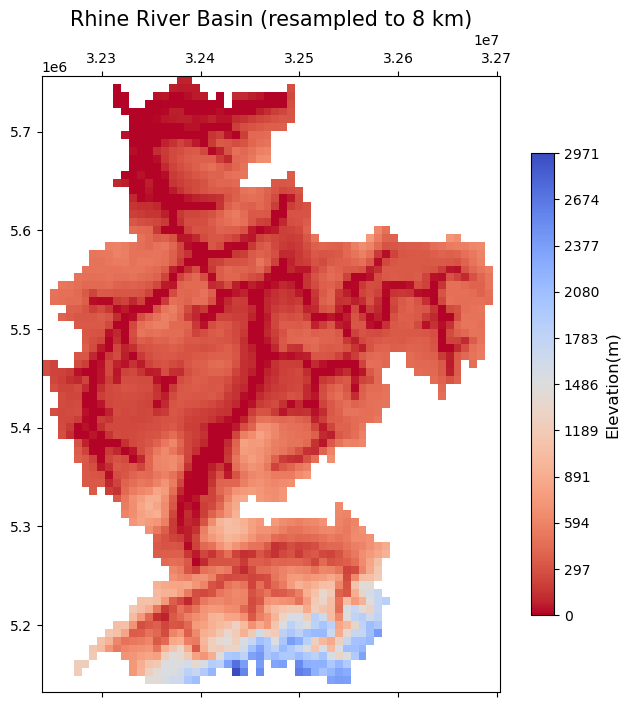

(<Figure size 800x800 with 2 Axes>,
 <Axes: title={'center': 'Rhine River Basin (resampled to 8 km)'}>)

In [9]:
dataset_8km.plot(vmin=0, title="Rhine River Basin (resampled to 8 km)", cbar_label="Elevation(m)")

### Reproject

In [10]:
print(f"EPSG: {dataset.epsg}")
print(f"Coordinate reference system: {dataset.crs}")
print(f"Dataset dimensions: {dataset.shape}")

EPSG: 4647
Coordinate reference system: PROJCS["ETRS89 / UTM zone 32N (zE-N)",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4258"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",32500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","4647"]]
Dataset dimensions: (1, 125, 93)


In [11]:
resampled_dataset = dataset.to_crs(4326)

In [12]:
print(resampled_dataset)


            Cell size: 0.05475332958287695
            Dimension: 104 * 123
            EPSG: 4326
            Number of Bands: 1
            Band names: ['Band_1']
            Mask: -3.4028234663852886e+38
            Data type: float32
            File: 
        


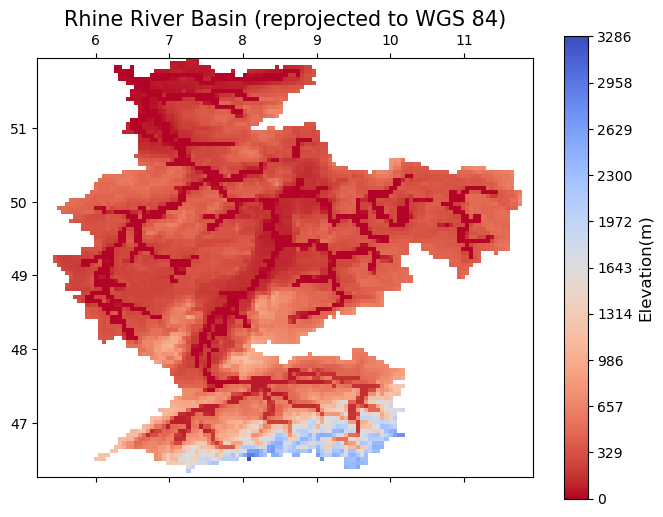

(<Figure size 800x800 with 2 Axes>,
 <Axes: title={'center': 'Rhine River Basin (reprojected to WGS 84)'}>)

In [13]:
resampled_dataset.plot(vmin=0, title="Rhine River Basin (reprojected to WGS 84)", cbar_label="Elevation(m)")

### Crop/Clip

In [14]:
path = "../../examples/data/geotiff/noah-precipitation-1979-europe.tif"
meteo_data = Dataset.read_file(path)

In [15]:
print(meteo_data)


            Cell size: 0.5
            Dimension: 25 * 40
            EPSG: 4326
            Number of Bands: 4
            Band names: ['Band_1', 'Band_2', 'Band_3', 'Band_4']
            Mask: -9.969209968386869e+36
            Data type: float32
            File: ../../examples/data/geotiff/noah-precipitation-1979-europe.tif
        


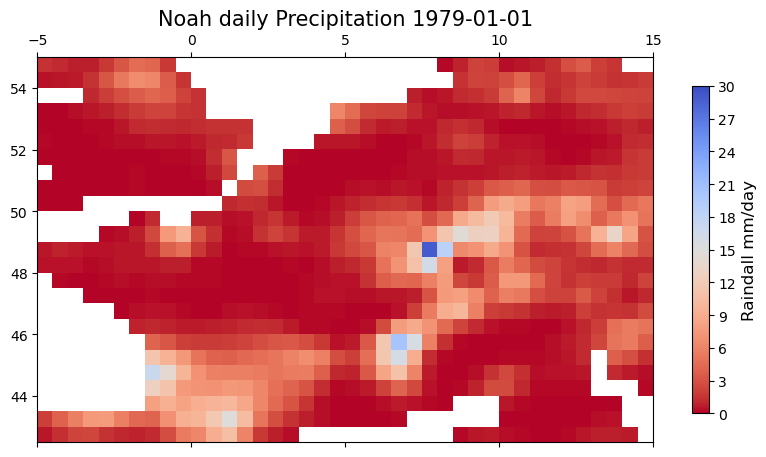

In [16]:
fig, ax = meteo_data.plot(
    band=0, figsize=(10, 5), title="Noah daily Precipitation 1979-01-01", cbar_label="Raindall mm/day", vmax=30,
    cbar_length=0.85
)

In [17]:
meteo_data_r = meteo_data.to_crs(4647)

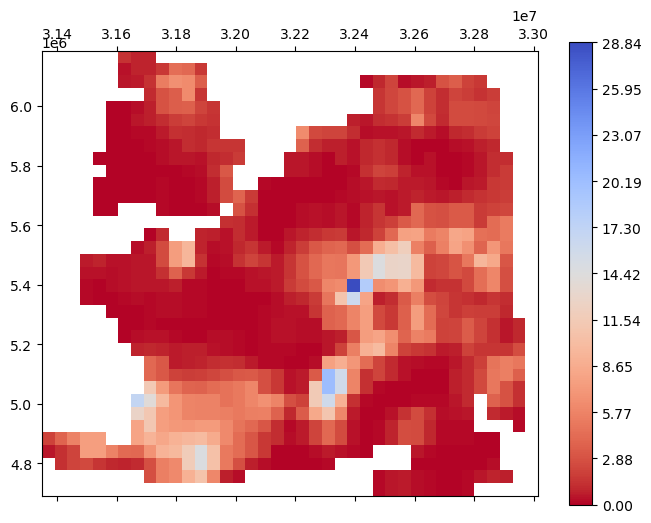

(<Figure size 800x800 with 2 Axes>, <Axes: >)

In [18]:
meteo_data_r.plot(band=0)

In [19]:
rhine_meteo_data = meteo_data_r.crop(dataset)

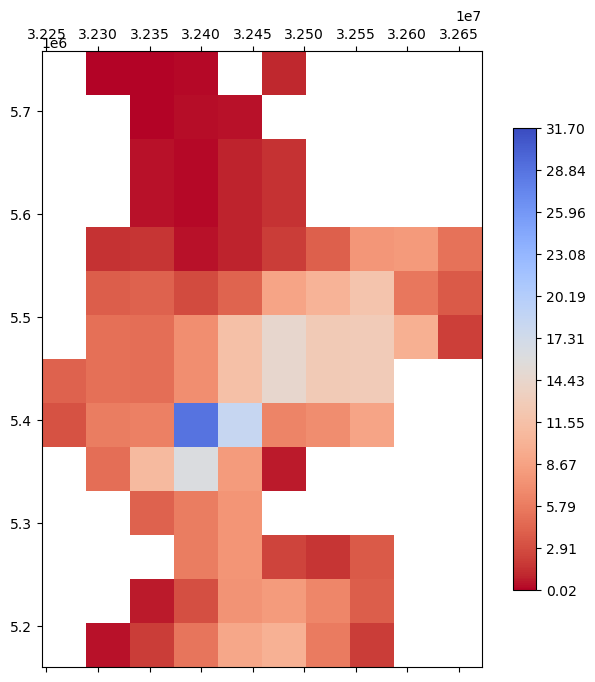

(<Figure size 800x800 with 2 Axes>, <Axes: >)

In [20]:
rhine_meteo_data.plot(band=0)

In [21]:
rhine_meteo_data


            Cell size: 42702.67218171488
            Dimension: 14 * 10
            EPSG: 4647
            Number of Bands: 4
            Band names: ['Band_1', 'Band_2', 'Band_3', 'Band_4']
            Mask: -9.969209968386869e+36
            Data type: float32
            projection: PROJCS["ETRS89 / UTM zone 32N (zE-N)",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4258"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",32500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","4647"]]
            Metadata: {}
            File: 
        